In [2]:
# import libraries 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import matplotlib.pyplot as plt
pio.templates.default = "plotly_white"
import os


In [ ]:
'''
initialising the stock symbols
and merging all datasets
from Yahoo finance 
'''



path = r"/Users/ambl/Documents/My_github/Market analysis /data_2"

# List of CSV files with corresponding stock symbols
files_and_symbols = {
    'AAPL.csv': 'AAPL',
    'GOOG.csv': 'GOOG',
    'MSFT.csv': 'MSFT',
    'AMZN.csv': 'AMZN',
    'META.csv': 'META', 
    'TSLA.csv': 'TSLA', 
    'NVDA.csv': 'NVDA'
}


data_frames = []

for file, symbol in files_and_symbols.items():
    
    file_path = os.path.join(path, file)
    
   
    df = pd.read_csv(file_path)
    
    
    df['Stock Symbol'] = symbol
    
    data_frames.append(df)


stock_data = pd.concat(data_frames, ignore_index=True)


combined_file_path = os.path.join(path, "combined_stock_data.csv")
stock_data.to_csv(combined_file_path, index=False)

print(f"Combined DataFrame saved to {combined_file_path}.")

In [66]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Symbol
0,2023-08-10,179.479996,180.750000,177.600006,177.970001,176.825165,54686900,AAPL
1,2023-08-11,177.320007,178.619995,176.550003,177.789993,176.884857,51988100,AAPL
2,2023-08-14,177.970001,179.690002,177.309998,179.460007,178.546356,43675600,AAPL
3,2023-08-15,178.880005,179.479996,177.050003,177.449997,176.546600,43622600,AAPL
4,2023-08-16,177.130005,178.539993,176.500000,176.570007,175.671082,46964900,AAPL


In [67]:
stock_data.shape

(1764, 8)

In [68]:
stock_data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Stock Symbol     object
dtype: object

In [69]:
stock_data.groupby('Stock Symbol')['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Stock Symbol,,,,,,,,
AAPL,252.0,187.756508,16.301861,165.000000,175.370007,184.384995,193.459999,234.820007
AMZN,252.0,161.990754,21.928223,119.570000,142.800003,167.010002,181.387501,200.000000
GOOG,252.0,150.945913,18.376351,123.400002,136.732506,143.735001,168.515003,192.660004
META,252.0,410.225675,84.783348,283.250000,320.999992,442.485001,490.502502,539.909973
MSFT,252.0,389.032540,41.813515,312.140015,360.650001,402.214996,420.592491,467.559998
NVDA,252.0,74.353103,29.290700,40.326000,46.962750,69.546501,92.499496,135.580002
TSLA,252.0,212.501389,33.411569,142.050003,180.004998,212.035004,242.719994,276.040009


In [70]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d' )


In [ ]:
pivot_data_close = stock_data.pivot(index='Date', columns='Stock Symbol', values='Close')


fig = make_subplots(rows=1, cols=1)


for column in pivot_data_close.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data_close.index, y=pivot_data_close[column], name=column),
        row=1, col=1
    )


fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Stock Symbol',
    showlegend=True
)

#
fig.show()

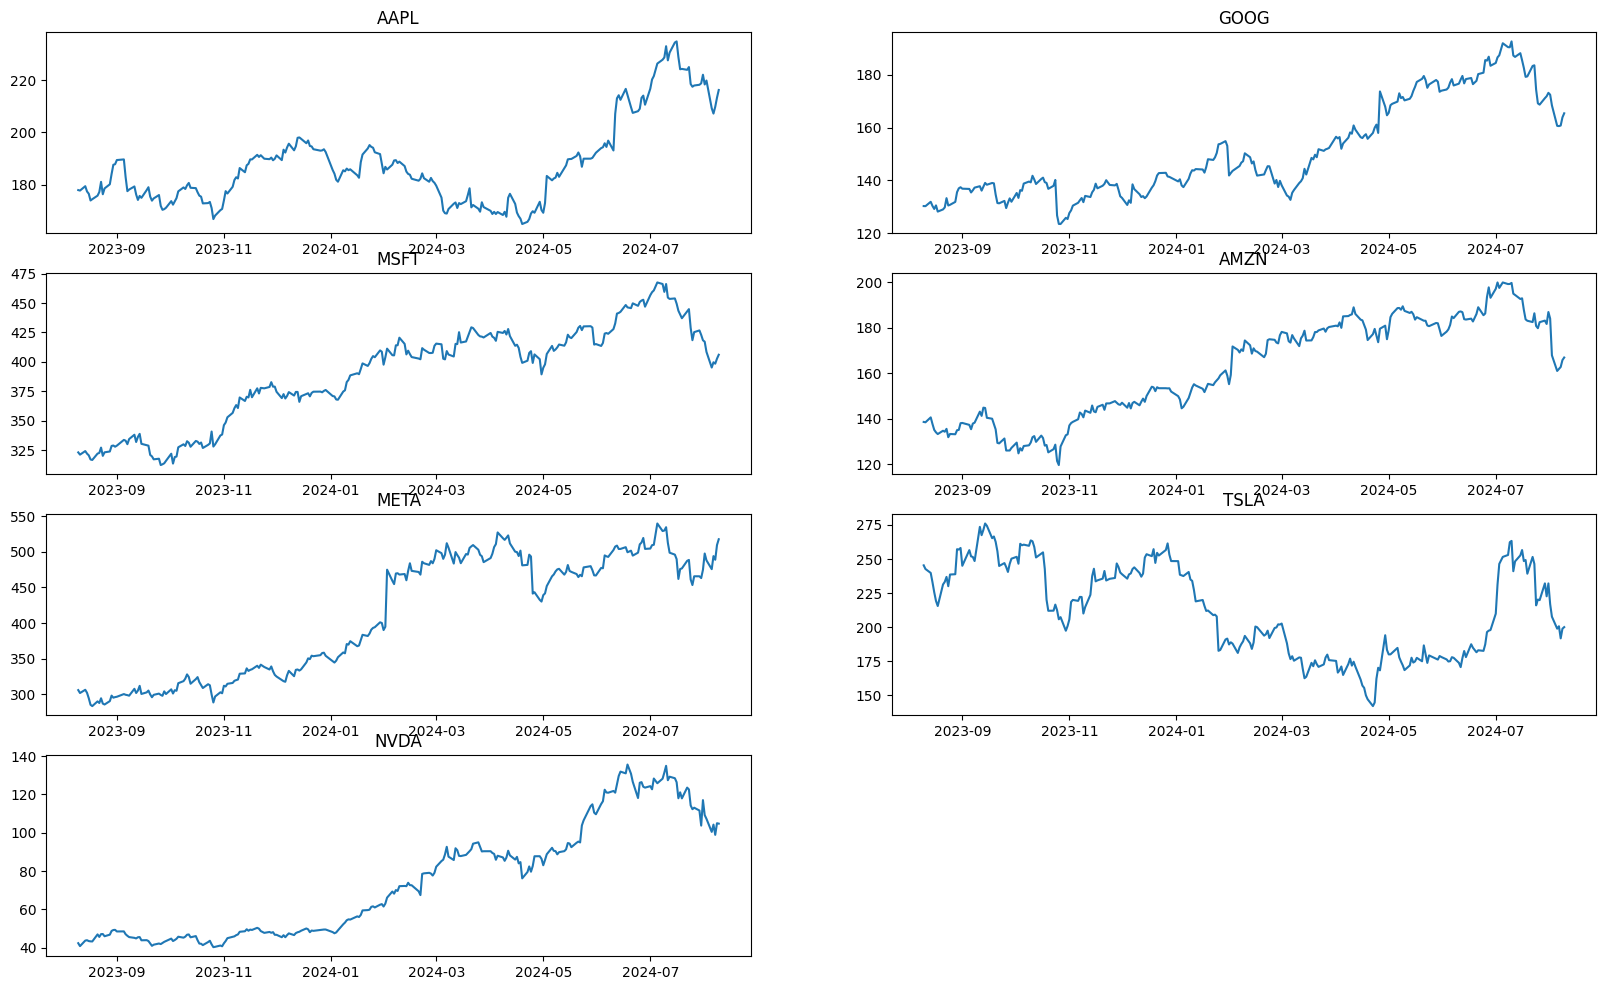

In [77]:
tech_list = stock_data['Stock Symbol'].unique()
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(4, 2, i)
    df=stock_data[stock_data['Stock Symbol']==company]
    plt.plot(df['Date'],df['Close'])
    plt.title(company)

In [78]:
pivot_data_vol = stock_data.pivot(index='Date', columns='Stock Symbol', values='Volume')


fig = make_subplots(rows=1, cols=1)

for column in pivot_data_vol.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data_vol.index, y=pivot_data_vol[column], name=column),
        row=1, col=1
    )

fig.update_layout(
    title_text='Time Series of Volume',
    xaxis_title='Date',
    yaxis_title='Volume',
    legend_title='Stock Symbol',
    showlegend=True
)

fig.show()

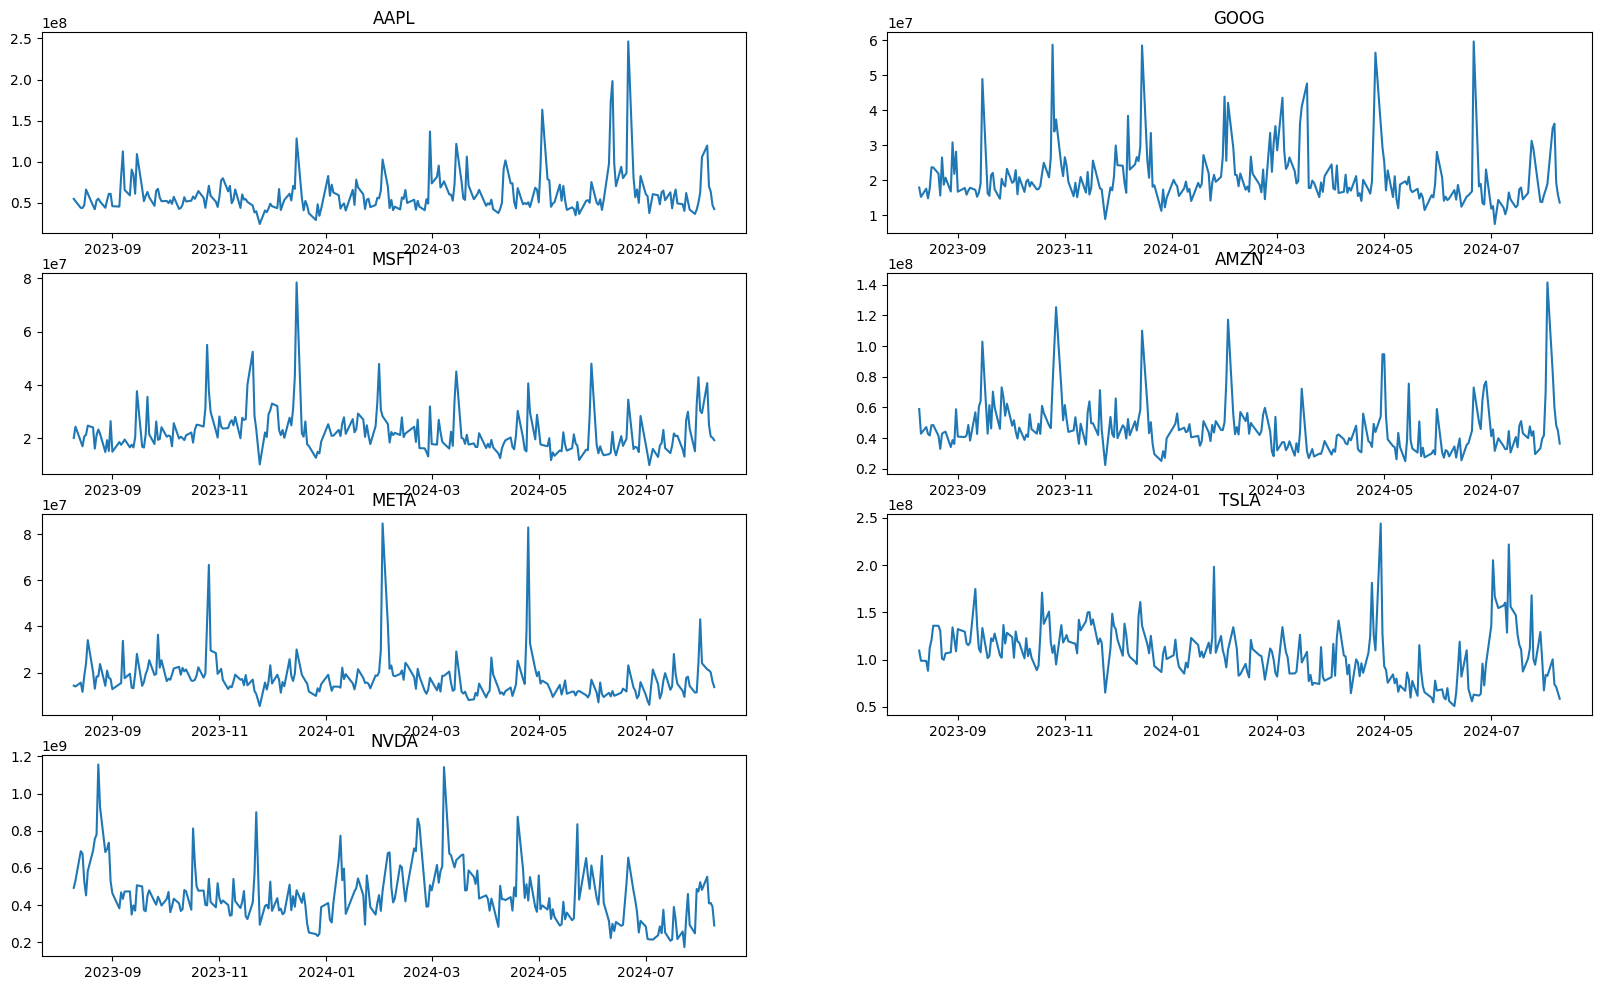

In [79]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(4, 2, i)
    df=stock_data[stock_data['Stock Symbol']==company]
    plt.plot(df['Date'],df['Volume'])
    plt.title(company)

In [80]:
# Volatility Analysis
volatility = pivot_data_close.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Stock Symbol'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the figure
fig.show()

In [81]:
# Correlation Analysis
correlation_matrix = pivot_data_close.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Stock Symbol',
    yaxis_title='Stock Symbol'
)

# Show the figure
fig.show()

In [82]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data_close.iloc[-1] - pivot_data_close.iloc[0]) / pivot_data_close.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Stock Symbol'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()

In [83]:
daily_returns = pivot_data_close.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})
risk_return_df

,Risk,Average Daily Return
Stock Symbol,,
AAPL,0.014355,0.000878
AMZN,0.017750,0.000900
GOOG,0.017425,0.001105
META,0.023460,0.002367
MSFT,0.012549,0.000991
NVDA,0.031548,0.004100
TSLA,0.034263,-0.000232


In [84]:
fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()